# GeneLab UPX Pipeline Development
## Compare Qiagen GeneGlobe to GeneLab pipeline results
Jonathan Galazka
Qiagen states that they utilize a reference genome of GRCm38 and reference transcriptome of Gencode release M20. GeneLab pipeline utilizes GRCm38.primary_assembly.genome.fa and GRCm38_M20_ERCC.gtf. ERCC sequences and annotation are appended to these.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [18]:
GG_counts = pd.read_csv('GG_counts.txt', sep='\t', index_col=0)

In [85]:
new_index_gg = []
for index in GG_counts.index:
    if(index[0:2] == '_E'):
        new_index_gg.append(index[1:-1])
    else:
        new_index_gg.append(index)

In [86]:
GG_counts.index = new_index_gg
GG_counts.index.name = 'gene'

In [87]:
GG_counts.tail()

,UMRR_1_GG,UMRR_2_GG,UMRR_3_GG,LVR_1_GG,LVR_2_GG,LVR_3_GG
gene,,,,,,
ERCC-00163,13,9,8,7,10,4
ERCC-00164,0,0,1,1,1,0
ERCC-00165,19,20,19,12,19,17
ERCC-00170,6,5,2,5,4,7
ERCC-00171,1219,1383,1113,1095,1168,1241


In [129]:
GL_counts = pd.read_csv('GL_counts.txt', sep='\t', index_col=0)

In [130]:
new_index_gl = []
for index in GL_counts.index:
    if(index[0:2] == '_E'):
        new_index_gl.append(index[1:-1])
    else:
        new_index_gl.append(index)

In [131]:
GL_counts.index = new_index_gl
GL_counts.index.name = 'gene'

In [132]:
GG_counts.tail()

,UMRR_1_GG,UMRR_2_GG,UMRR_3_GG,LVR_1_GG,LVR_2_GG,LVR_3_GG
gene,,,,,,
ERCC-00163,13,9,8,7,10,4
ERCC-00164,0,0,1,1,1,0
ERCC-00165,19,20,19,12,19,17
ERCC-00170,6,5,2,5,4,7
ERCC-00171,1219,1383,1113,1095,1168,1241


In [133]:
GG_counts.sum()

UMRR_1_GG    493672
UMRR_2_GG    583265
UMRR_3_GG    453676
LVR_1_GG     856763
LVR_2_GG     794053
LVR_3_GG     635438
dtype: int64

In [134]:
GL_counts.sum()

UMRR_1_GL    413457
UMRR_2_GL    487949
UMRR_3_GL    383922
LVR_1_GL     697564
LVR_2_GL     649823
LVR_3_GL     533991
dtype: int64

In [135]:
LG_GG_counts = np.log2(GG_counts+1)
LG_GL_counts = np.log2(GL_counts+1)

Text(0.5, 1.0, 'R2: 0.8251147981479623')

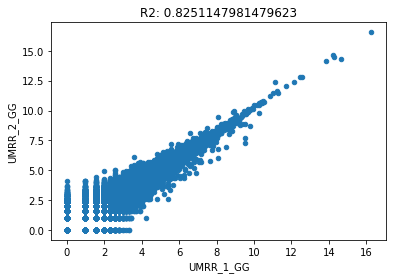

In [136]:
ax = LG_GG_counts.plot.scatter('UMRR_1_GG', 'UMRR_2_GG')
ax.set_title('R2: ' + str(r2_score(LG_GG_counts['UMRR_1_GG'], LG_GG_counts['UMRR_2_GG'])))

Text(0.5, 1.0, 'R2: 0.8270272861013084')

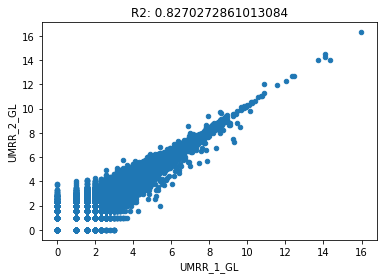

In [137]:
ax = LG_GL_counts.plot.scatter('UMRR_1_GL', 'UMRR_2_GL')
ax.set_title('R2: ' + str(r2_score(LG_GL_counts['UMRR_1_GL'], LG_GL_counts['UMRR_2_GL'])))

In [138]:
combined = GG_counts.merge(GL_counts, how='inner', on='gene')
combined.shape

(18855, 12)

In [139]:
GL_counts.shape

(19165, 6)

In [140]:
GG_counts.shape

(20753, 6)

In [141]:
LG_combined = LG_GG_counts.merge(LG_GL_counts, how='inner', on='gene')

Text(0.5, 1.0, 'R2: 0.9382365597484724')

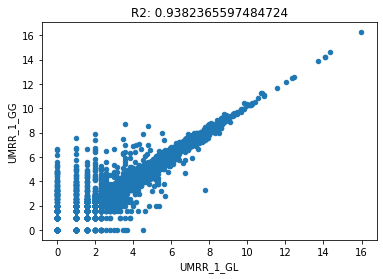

In [142]:
ax = LG_combined.plot.scatter('UMRR_1_GL', 'UMRR_1_GG')
ax.set_title('R2: ' + str(r2_score(LG_combined['UMRR_1_GL'], LG_combined['UMRR_1_GG'])))

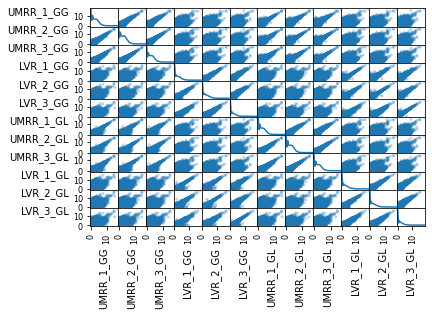

In [143]:
axes = pd.plotting.scatter_matrix(LG_combined, alpha=0.3, diagonal='kde')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

In [144]:
ERCC_index = LG_combined.index[LG_combined.index.str[0:5] == 'ERCC-']
Gene_index = LG_combined.index[LG_combined.index.str[0:5] != 'ERCC-']

In [145]:
LG_ERCC = LG_combined.loc[ERCC_index, : ]
LG_ERCC.head()

,UMRR_1_GG,UMRR_2_GG,UMRR_3_GG,LVR_1_GG,LVR_2_GG,LVR_3_GG,UMRR_1_GL,UMRR_2_GL,UMRR_3_GL,LVR_1_GL,LVR_2_GL,LVR_3_GL
gene,,,,,,,,,,,,
ERCC-00002,12.576248,12.815383,12.533816,12.101976,12.272047,12.383434,12.448374,12.691307,12.411246,11.989394,12.160187,12.250595
ERCC-00003,8.495855,8.787903,8.434628,7.546894,7.971544,7.686501,8.348728,8.661778,8.335390,7.426265,7.870365,7.546894
ERCC-00004,12.150699,12.416798,12.021327,11.458407,11.847840,11.794822,12.051889,12.311748,11.927778,11.362492,11.757807,11.700873
ERCC-00009,8.361944,8.882643,8.344296,7.918863,8.060696,8.228819,8.194757,8.734710,8.199672,7.794416,7.894818,8.076816
ERCC-00013,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


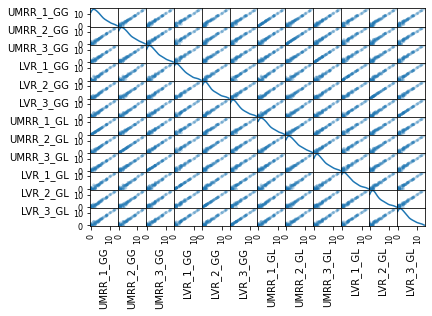

In [146]:
axes = pd.plotting.scatter_matrix(LG_ERCC, alpha=0.3, diagonal='kde')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

Text(0.5, 1.0, 'R2: 0.999105683314245')

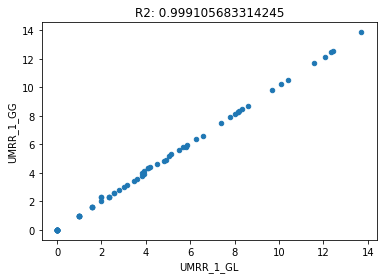

In [147]:
ax = LG_ERCC.plot.scatter('UMRR_1_GL', 'UMRR_1_GG')
ax.set_title('R2: ' + str(r2_score(LG_ERCC['UMRR_1_GL'], LG_ERCC['UMRR_1_GG'])))

Text(0.5, 1.0, 'R2: 0.9627482035848656')

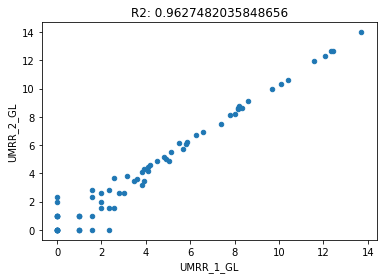

In [148]:
ax = LG_ERCC.plot.scatter('UMRR_1_GL', 'UMRR_2_GL')
ax.set_title('R2: ' + str(r2_score(LG_ERCC['UMRR_1_GL'], LG_ERCC['UMRR_2_GL'])))

Text(0.5, 1.0, 'R2: 0.9627020633940676')

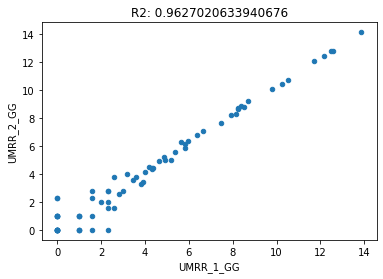

In [149]:
ax = LG_ERCC.plot.scatter('UMRR_1_GG', 'UMRR_2_GG')
ax.set_title('R2: ' + str(r2_score(LG_ERCC['UMRR_1_GG'], LG_ERCC['UMRR_2_GG'])))

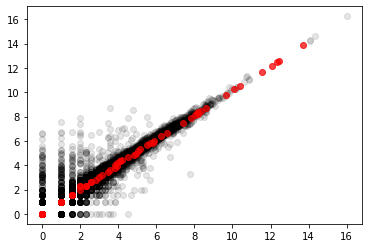

In [150]:
plt.scatter(LG_combined['UMRR_1_GL'], LG_combined['UMRR_1_GG'], color='k', alpha=0.1)
plt.scatter(LG_ERCC['UMRR_1_GL'], LG_ERCC['UMRR_1_GG'], color='r', alpha=0.7)
plt.show()

In [151]:
combined.to_csv('combined_counts.csv')